# Самостоятельная работа №6

## Часть 1

In [6]:
id <- 1:3
country <- c("Flatland", "Wonderland", "Sphereland")
craziness <- c(20, 15, 18)
region_type <- c("A", "B", "A")
author <- c("Abbot", "Carroll", "Burger")
size <- c(10, 100, 30)
df <- data.frame(id, country, craziness, region_type, author, size)

df

sapply(df, class)

id,country,craziness,region_type,author,size
<int>,<chr>,<dbl>,<chr>,<chr>,<dbl>
1,Flatland,20,A,Abbot,10
2,Wonderland,15,B,Carroll,100
3,Sphereland,18,A,Burger,30


id     country   craziness region_type      author        size 
  "integer" "character"   "numeric" "character" "character"   "numeric"

In [9]:
# count variables of passed types
first <- function(df, describe_vector=c("numeric", "factor", "character")) {
    classes <- c()
    for (i in length(df[1, ])) {
        classes <- c(classes, class(df[, i]))
    }
    classes <- table(classes)
    na_to_zero <- function(x) if (is.na(x)) 0 else x
    for (name in describeVector) {
        classes[name] <- na_to_zero(classes[name])
    }
    return(c(classes[describe_vector]))
}

In [8]:
first(df)

numeric    factor character 
        2         0         3

In [10]:
# select rows of the passed type
second <- function(df, choose="numeric") {
    result <- data.frame(temp = rep(c(0), length(df[1, ])))
    for (i in length(df[1, ])) {
        if (class(df[, i]) == choose) {
            result[colnames(df[i])] <- df[i]
        }
    }
    result <- result[-1]
    return(result)
}

In [11]:
second(df)

craziness,size
<dbl>,<dbl>
20,10
15,100
18,30
20,10
15,100
18,30


In [12]:
# Compute a mediana of the given vector
four <- function(vector) {
    if (class(vector) == "numeric") {
        return(median(vector))
    }
    else {
        print("Vector is not numeric, cannot compute the median")
        return(NA)
    }
}

In [13]:
four(c(1, 2, 3, 4, 5, 6, 6))

[1] 4

## Часть 2

In [17]:
if ("quantmod" %in% rownames(installed.packages()) == FALSE) {
    install.packages("quantmod")
}
library(quantmod)


if ("stringr" %in% rownames(installed.packages()) == FALSE) {
    install.packages("stringr")
}
library(stringr)


downloadable_stocks <- c("ATVI", "^IXIC")
quantmod::getSymbols(Symbols = downloadable_stocks, src = "yahoo", from = as.Date.character("1900-01-01"))

[1] "ATVI"  "^IXIC"

In [18]:
df <- data.frame(get(downloadable_stocks[1]))
downloadable_stocks <- stringr::str_remove(downloadable_stocks, "[:punct:\\^]")
rm(list = downloadable_stocks)
head(df)

,ATVI.Open,ATVI.High,ATVI.Low,ATVI.Close,ATVI.Volume,ATVI.Adjusted
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1993-10-25,1.250000,1.250000,0.937500,0.937500,18000,0.836103
1993-10-26,1.229167,1.229167,0.854167,0.864583,189600,0.771073
1993-10-27,0.864583,0.864583,0.864583,0.864583,0,0.771073
1993-10-28,0.708333,0.833333,0.583333,0.822917,30000,0.733913
1993-10-29,0.875000,0.875000,0.833333,0.833333,172800,0.743202
1993-11-01,0.833333,0.875000,0.833333,0.875000,76800,0.780363


In [21]:
proportion <- function(x, dt, func) {
    stopifnot(is.vector(x) && class(x) == "numeric")
    stopifnot(is.numeric(dt) & dt %% 1 == 0 & dt > 0)
    stopifnot(2 * dt < length(x))
    stopifnot(is.function(func))
    min_elem <- min(x)
    x <- sapply(x, function(x) x + min_elem + 1)
    y <- rep(c(0), length(x) - 2 * dt)
    for (i in (1 + dt):(length(x) - dt)) {
        y[i - dt] <- func(x[i - dt], x[i], x[i + dt])
    }
    return(y)
}

In [20]:
arifm_mean <- function(prev, current, nex) log((prev + nex) / (2 * current))
geom_mean <- function(prev, current, nex) log(prev * nex /  current^2)
garm_mean <- function(prev, current, nex) log(2 * prev * nex / (current * (prev + nex)))

In [25]:
arifm_proportion <- function(x, dt=1) {
    proportion(x, dt, arifm_mean)
}
geom_proportion <- function(x, dt=1) {
    proportion(x, dt, geom_mean)
}
garm_proportion <- function(x, dt=1) {
    proportion(x, dt, garm_mean)
}

In [27]:
arifm_proportion(c(1, 2, 1, 4, 3, 1, 7), 2)
geom_proportion(c(1, 2, 1, 4, 3, 1, 7), 2)
garm_proportion(c(1, 2, 1, 4, 3, 1, 7), 2)

[1]  0.2876821 -0.5389965  0.1823216

[1]  0.51082562 -1.09861229  0.07696104

[1]  0.2231436 -0.5596158 -0.1053605

In [28]:
out_of_trend <- function(x, dt=1, method="Arifm") {
    stopifnot(method == "Arifm" || method == "Geom" || method == "Garm")
    
    return (switch(method,
                  "Arifm"=arifm_proportion(x, dt),
                  "Geom"=geom_proportion(x, dt),
                  "Garm"=garm_proportion(x, dt),
                  arifm_proportion(x, dt)))
}

In [29]:
out_of_trend(c(1, 2, 1, 4, 3, 1, 7), 2) == arifm_proportion(c(1, 2, 1, 4, 3, 1, 7), 2)
out_of_trend(c(1, 2, 1, 4, 3, 1, 7), 2, "Geom") == geom_proportion(c(1, 2, 1, 4, 3, 1, 7), 2)
out_of_trend(c(1, 2, 1, 4, 3, 1, 7), 2, "Garm") == garm_proportion(c(1, 2, 1, 4, 3, 1, 7), 2)

[1] TRUE TRUE TRUE

[1] TRUE TRUE TRUE

[1] TRUE TRUE TRUE

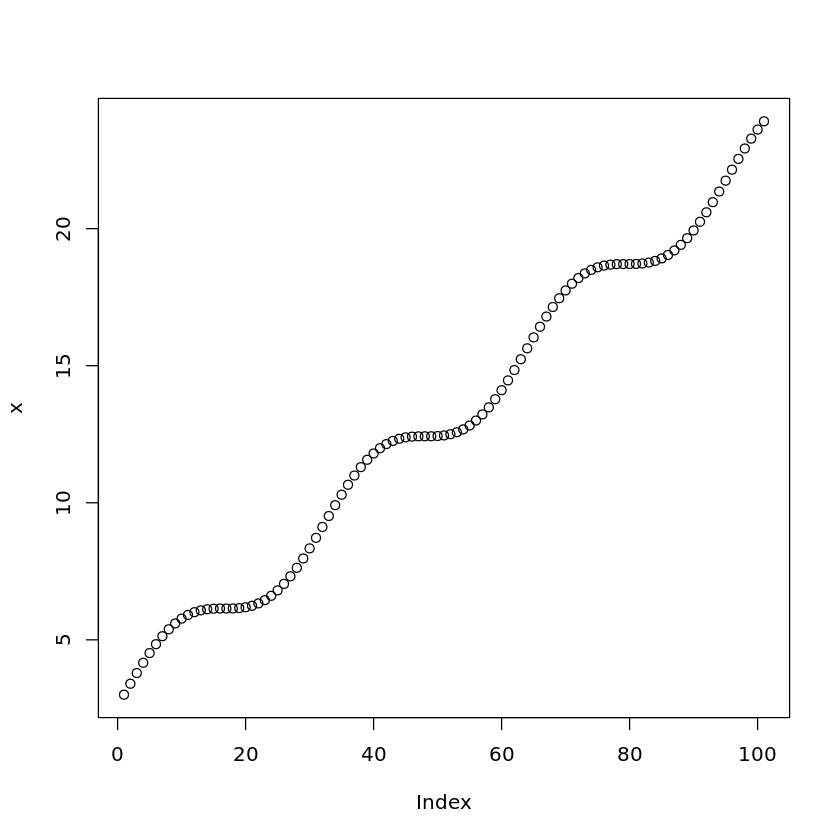

In [30]:
t = seq(0, 10, 0.1)
x = 2*t + 3 + sin(2*t)
plot(x)

In [31]:
mean(x)
xn <- out_of_trend(x, method="Arifm")
mean(xn)
xn <- out_of_trend(x, method="Geom")
mean(xn)
xn <- out_of_trend(x, method="Garm")
mean(xn)

[1] 13.03372

[1] -6.821495e-05

[1] -0.0004506113

[1] -0.0003823964

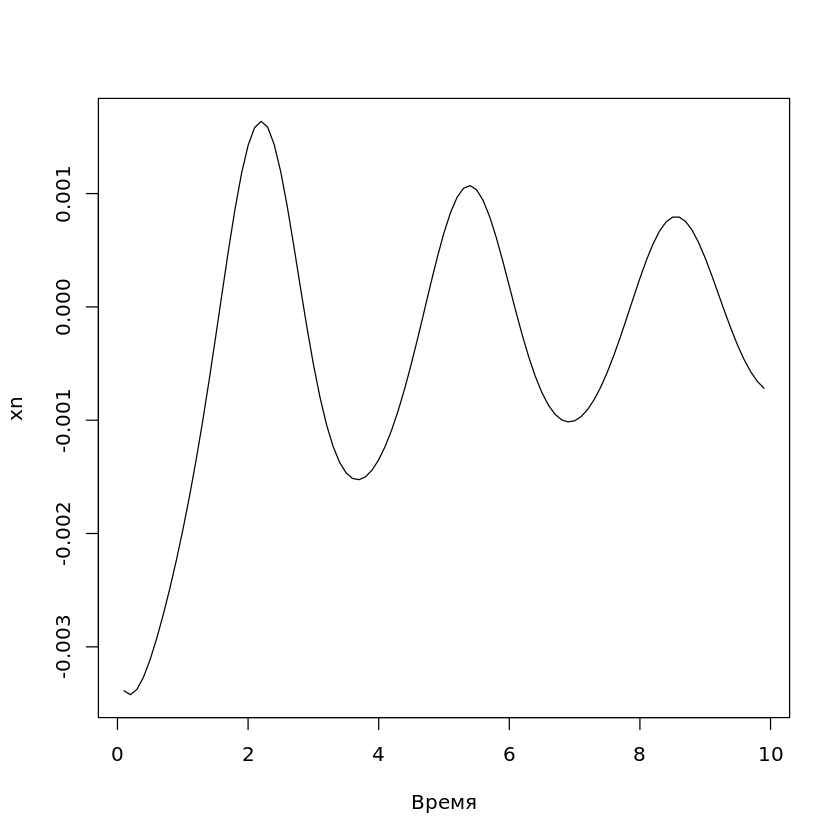

In [33]:
plot(t[2:(length(t) - 1)], xn, type="l", xlab="Время", ylab="xn")

In [32]:
alter_johns_tau <- function(y, tau) {
    stopifnot(is.vector(y) & is.numeric(y))
    n <- length(y)
    stopifnot(is.numeric(tau) & tau %% 1 == 0 & n > tau)
    summa <- 0
    for (i in 1:(n - tau)) {
        summa <- summa + abs(y[i + tau] - y[i])
    }
    return(1 / (n - tau) * summa)
}

alter_johns <- function(y) {
    return(sapply(1:(length(y) - 1), function(i) (alter_johns_tau(y, i))))
}

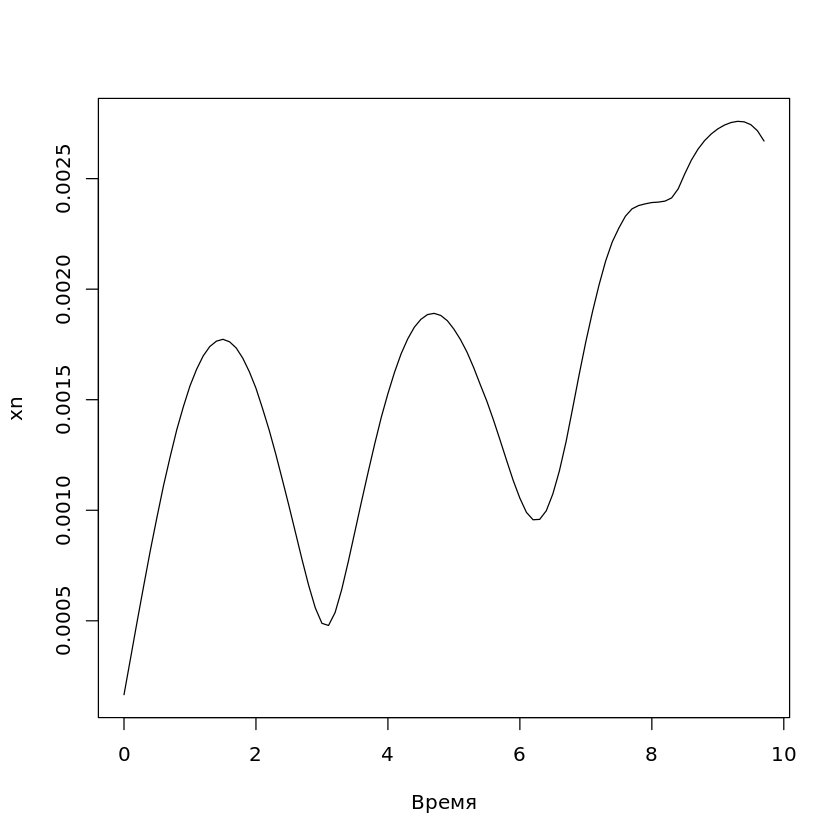

In [35]:
plot(t[1:(length(xn) - 1)], alter_johns(xn), type = "l", xlab = "Время", ylab = "xn")

In [38]:
out <- out_of_trend(df[[1]], method = "Geom")
res <- alter_johns(out)
head(res)

[1] 0.03853681 0.03149257 0.03181444 0.03187263 0.03226993 0.03147725

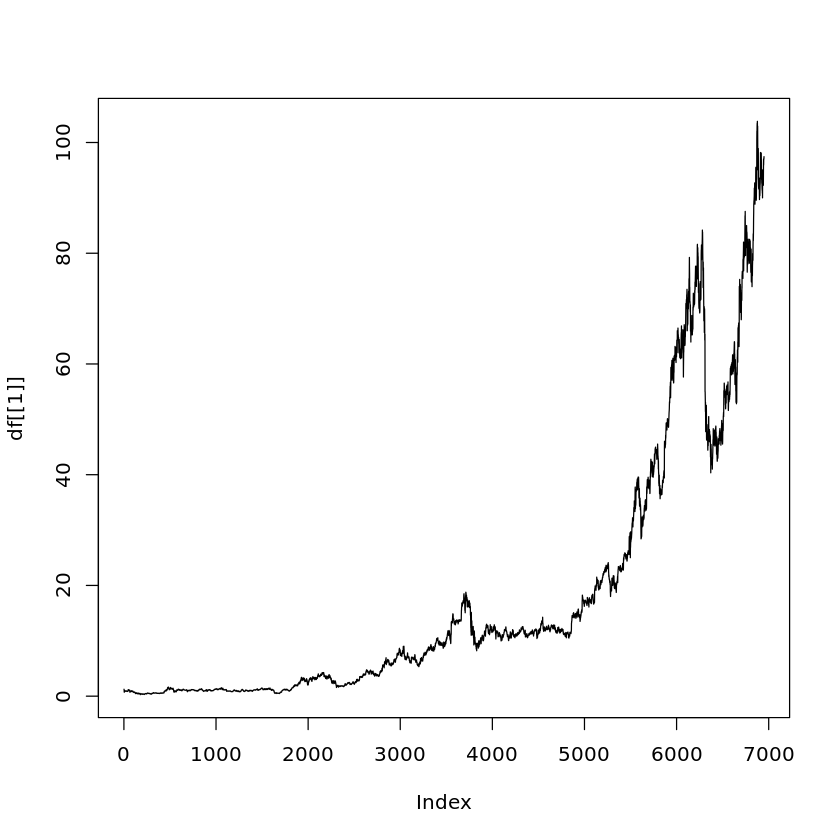

In [37]:
plot(df[[1]], type="l")

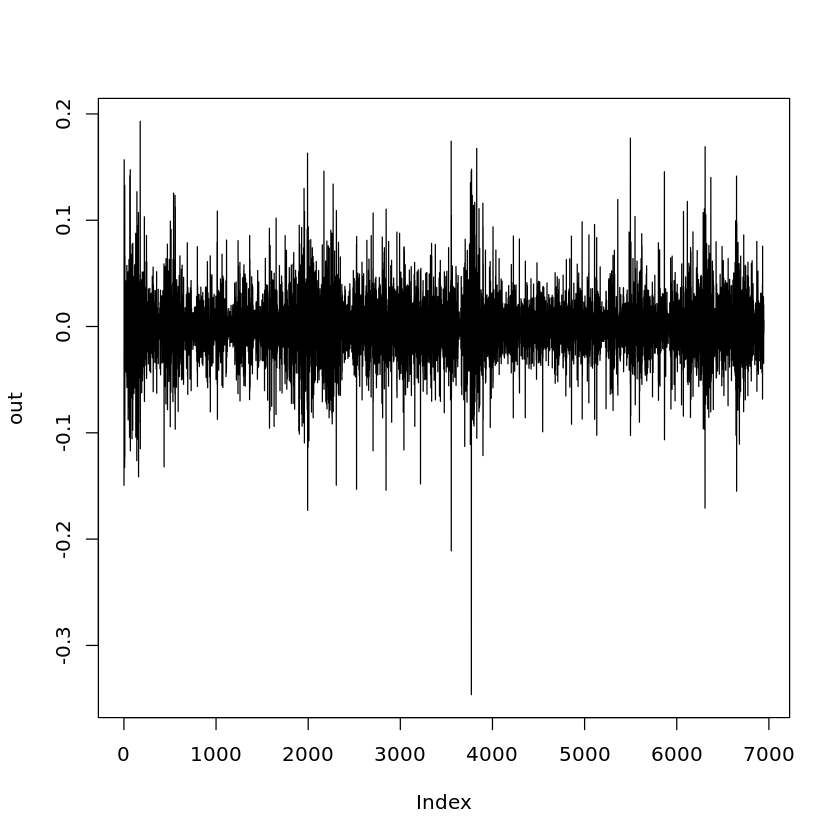

In [40]:
plot(out, type = "l")